# TSIA201 TP2 : Practical works on Filter Banks

**Practical work done by : IQBI Hamza**


In [38]:
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import time
import pyaudio
from copy import deepcopy

### 1.Two channel Filter Bank :

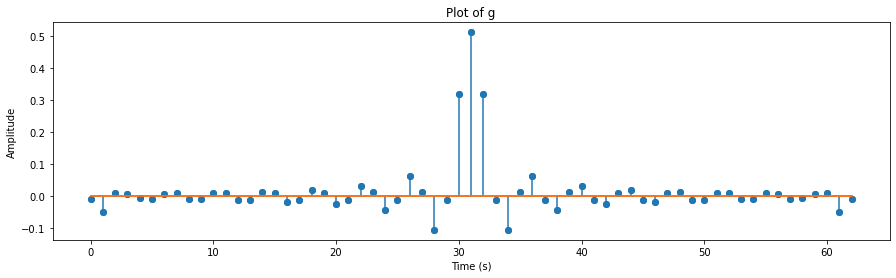

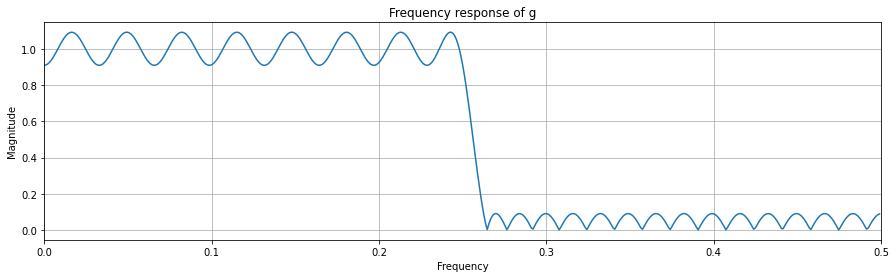

In [130]:
########## Q1

#----- Synthesising a low-pass filter of type 1 directly using the scipy.remez method -----#
'''There is an error in the practical work'''


def plot_response(fs, w, h, title):
    "Utility function to plot response functions"
    fig = plt.figure()
    fig.set_figheight(4)
    fig.set_figwidth(15)   
    ax = fig.add_subplot(111)
    ax.plot(0.5*fs*w/np.pi, np.abs(h))
    #ax.set_ylim(-40, 5)
    ax.set_xlim(0, fs/2)
    ax.grid(True)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Magnitude')
    ax.set_title(title)

def plot_impulse(g, numtaps, title) :
    fig = plt.figure()
    fig.set_figheight(4)
    fig.set_figwidth(15)
    plt.plot(np.arange(numtaps), g, 'o')
    plt.stem(g)
    plt.plot(np.arange(numtaps), np.zeros(numtaps))
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title(title)
    
N = 32                  # Size of the filter v
trans_width = 1/80      # Transition width
cutoff = 1/4 
N=32
numtaps = 2*N-1
g = signal.remez(numtaps, [0, cutoff, cutoff+trans_width, 0.5], [1, 0], Hz=fs)
nu, G = signal.freqz(g)

plot_impulse(g, numtaps, "Plot of g")

plot_response(fs, nu, G, "Frequency response of g")

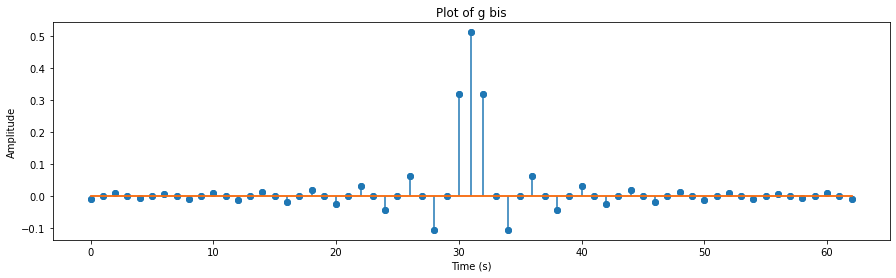

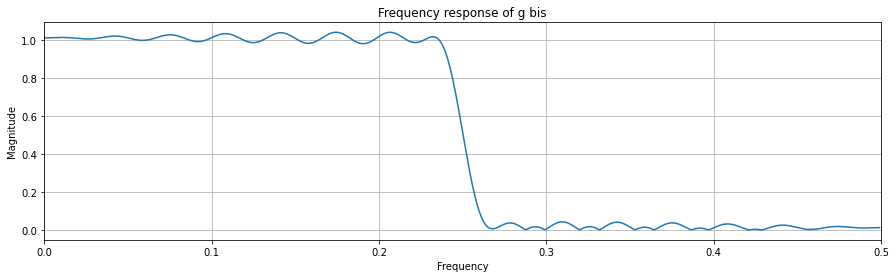

In [131]:
########## Q2

#----- Manually zeroing the coefficients which should be zero -----#
g_bis = deepcopy(g)

for k in range(0, len(g_bis)) :
    if k%2 != 0 and k != len(g_bis)//2 : g_bis[k] = 0

w, G_bis = signal.freqz(g_bis)

plot_impulse(g_bis, numtaps, "Plot of g bis")

plot_response(fs, w, G_bis, "Frequency response of g bis")

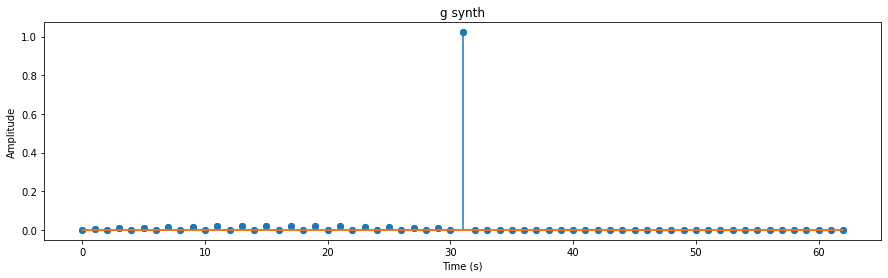

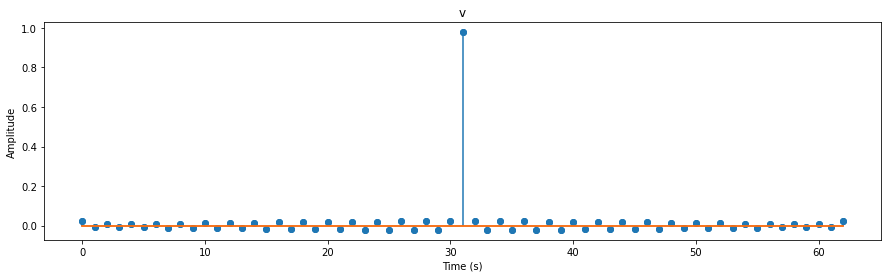

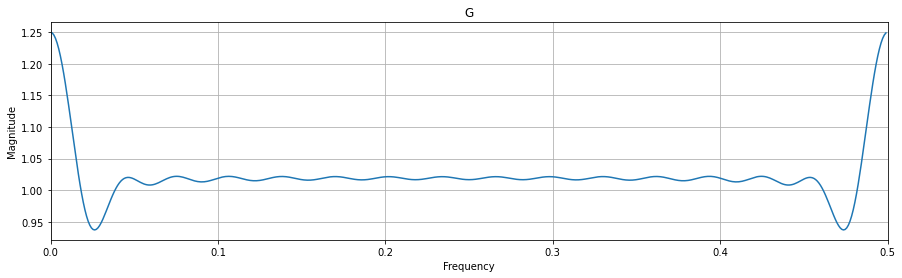

In [147]:
########## Q3

fs = 1
epsilon = 0.02*fs
v_cutoff = 0.5*fs - epsilon
N = 32
numtaps = 2*N-1
v = signal.remez(numtaps, [0, v_cutoff, 0.5, 0.5], [1, 0], Hz=fs)
wv, V = signal.freqz(v)
g_synth = np.zeros(numtaps)

for k in range(N):
    if k%2!=0 : g_synth[k] = v[2*k]
g_synth[N-1] = (v[2*(N-1)] + 1)
plot_impulse(g_synth, numtaps, "g synth")
plot_impulse(v, numtaps, "v")
wg, G_synth = signal.freqz(g_synth)
plot_response(fs, wg, G_synth, "G")
#G_synth = np.zeros(len(V))
#G_synth[:len(V)//2] = [V[2*k] + 1 for k in range(len(V)//2)]
#plot_response(fs, wv, G_synth, "G_synth")